# What did Adam do to AMC, and 2023 Earnings Prediction by Linear Regression

In [1]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import df2img
import math

plt.style.use("dark_background")

In [ ]:
years = list(range(2014, 2023))

df = pd.read_csv("data.csv", index_col = 0)

# Descriptive Data Visualizations

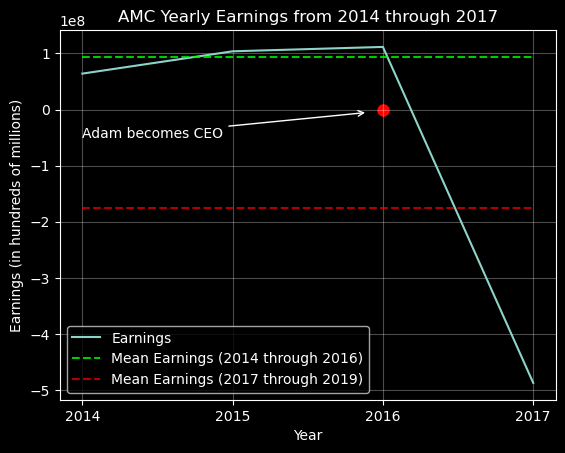

In [2]:
plt.plot(years[:4],  df.groupby("year").agg(["sum"])[:2017]["earnings"])
plt.plot(years[:4], [df.groupby("year").agg(["sum"])[:2016]["earnings"].mean()] * 4, color="lime", 
         alpha = 0.8, linestyle="--")
plt.plot(years[:4], [df.groupby("year").agg(["sum"])[2017:2019]["earnings"].mean()] * 4, color="red", 
         alpha = 0.7, linestyle="--")
plt.scatter([2016], [0], color="red", linewidth=3.0, edgecolor="red")
plt.annotate("Adam becomes CEO", xy=[2015.9, -0.05 * 10**8], xytext=[2014, -0.5 * 10**8], arrowprops={
    "facecolor":"red", "arrowstyle":"->", "connectionstyle":"arc3"})
plt.legend(["Earnings", "Mean Earnings (2014 through 2016)", "Mean Earnings (2017 through 2019)"])
plt.grid(True, alpha = 0.3)
plt.title("AMC Yearly Earnings from 2014 through 2017")
plt.xlabel("Year")
plt.ylabel("Earnings (in hundreds of millions)")
plt.xticks([2014, 2015, 2016, 2017])
plt.savefig("plots/earnings.2014.2017.png")
plt.show()

Zooming out for some context.

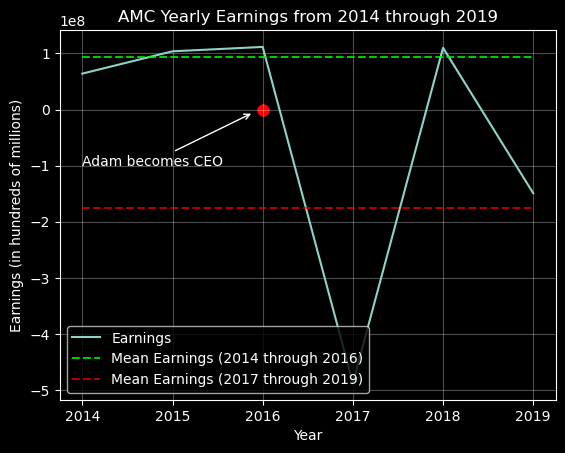

In [3]:
plt.plot(years[:6],  df.groupby("year").agg(["sum"])[:2019]["earnings"])
plt.plot(years[:6], [df.groupby("year").agg(["sum"])[:2016]["earnings"].mean()] * 6, color="lime", 
         alpha = 0.8, linestyle="--")
plt.plot(years[:6], [df.groupby("year").agg(["sum"])[2017:2019]["earnings"].mean()] * 6, color="red", 
         alpha = 0.7, linestyle="--")
plt.scatter([2016], [0], color="red", linewidth=3.0, edgecolor="red")
plt.annotate("Adam becomes CEO", xy=[2015.9, -0.05 * 10**8], xytext=[2014, -1 * 10**8], arrowprops={
    "facecolor":"red", "arrowstyle":"->", "connectionstyle":"arc3"})
plt.legend(["Earnings", "Mean Earnings (2014 through 2016)", "Mean Earnings (2017 through 2019)"])
plt.grid(True, alpha = 0.3)
plt.title("AMC Yearly Earnings from 2014 through 2019")
plt.xlabel("Year")
plt.ylabel("Earnings (in hundreds of millions)")
plt.xticks([2014, 2015, 2016, 2017, 2018, 2019])
plt.savefig("plots/earnings.2014.2019.png")
plt.show()

The entire dataset.

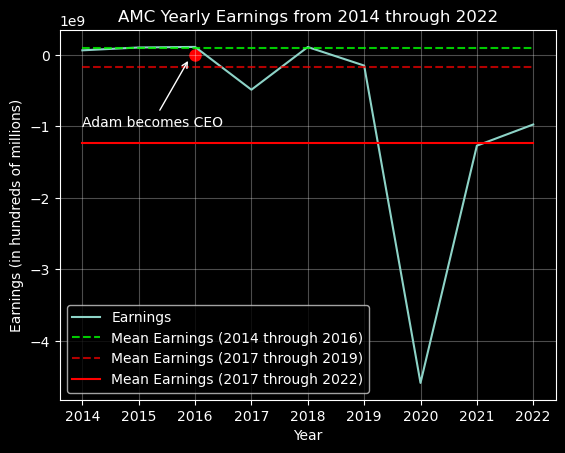

In [4]:
plt.plot(years[:],  df.groupby("year").agg(["sum"])[:]["earnings"])
plt.plot(years[:], [df.groupby("year").agg(["sum"])[:2016]["earnings"].mean()] * len(years), color="lime", 
         alpha = 0.8, linestyle="--")
plt.plot(years[:], [df.groupby("year").agg(["sum"])[2017:2019]["earnings"].mean()] * len(years), 
         color="red", alpha = 0.7, linestyle="--")
plt.plot(years, [df.groupby("year").agg(["sum"])[2017:]["earnings"].mean()] * len(years), 
         color="red")
plt.scatter([2016], [0], color="red", linewidth=3.0, edgecolor="red")
plt.annotate("Adam becomes CEO", xy=[2015.9, -0.05 * 10**9], xytext=[2014, -1 * 10**9], arrowprops={
    "facecolor":"red", "arrowstyle":"->", "connectionstyle":"arc3"})
plt.legend(["Earnings", "Mean Earnings (2014 through 2016)", "Mean Earnings (2017 through 2019)",
            "Mean Earnings (2017 through 2022)"])
plt.grid(True, alpha = 0.3)
plt.title("AMC Yearly Earnings from 2014 through 2022")
plt.xlabel("Year")
plt.ylabel("Earnings (in hundreds of millions)")
plt.xticks([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])
plt.savefig("plots/earnings.2014.2022.png")
plt.show()

Drop 2020 Q1 outlier, and superfluous columns. Extrapolate quarterly to yearly values. Alias columns with 
x and y variables.

          DBO gross      earnings
count  3.500000e+01  3.500000e+01
mean   9.074312e+09 -5.603539e+08
std    3.788194e+09  1.039427e+09
min    1.890192e+07 -3.784400e+09
25%    7.982850e+09 -9.022000e+08
50%    1.060793e+10 -5.400000e+07
75%    1.149479e+10  1.045160e+08
max    1.338965e+10  6.824000e+08


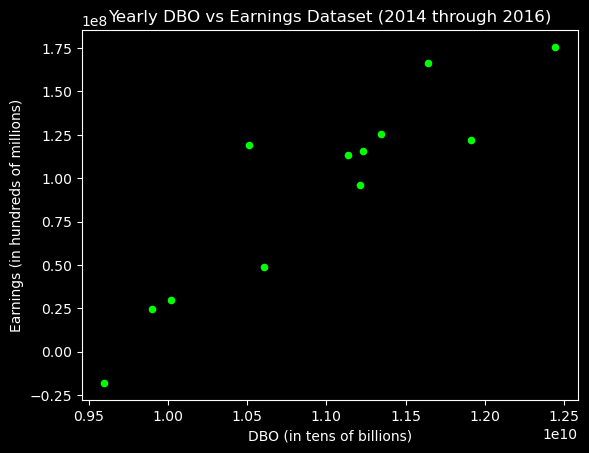

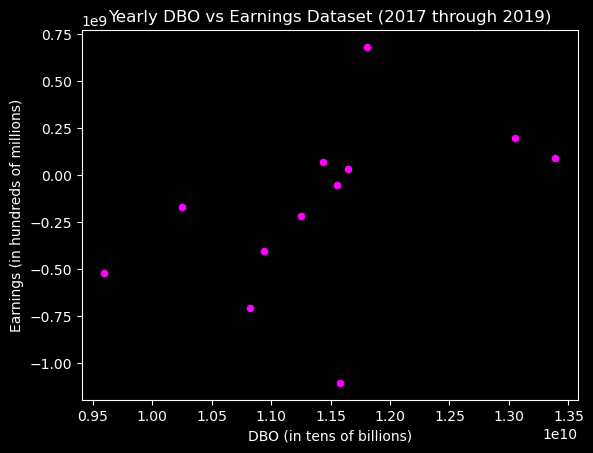

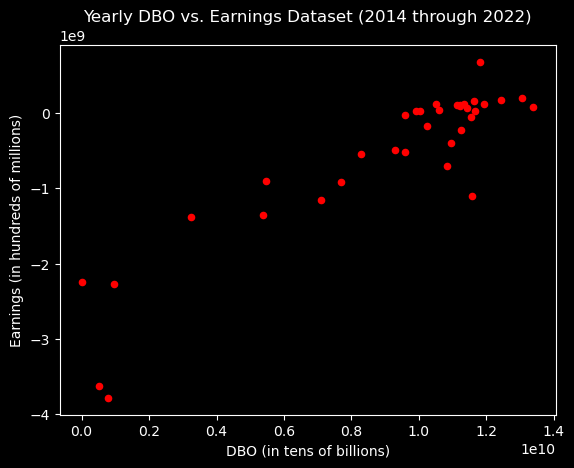

In [5]:
columns = ["DBO gross", "earnings"]
try: 
    df = df.drop(24)
    df["DBO gross"] = df["DBO gross"] * 4
    df["earnings"]  = df["earnings"]  * 4
except KeyError: pass
df = df[columns]
x  = df["DBO gross"]
y  = df["earnings"]
print(df.describe())
df.loc[:11].plot.scatter("DBO gross", "earnings", color="lime")
plt.title("Yearly DBO vs Earnings Dataset (2014 through 2016)")
plt.xlabel("DBO (in tens of billions)")
plt.ylabel("Earnings (in hundreds of millions)")
plt.savefig("plots/dataset.2014.2016.png")
plt.show()
df.loc[12:23].plot.scatter("DBO gross", "earnings", color="magenta")
plt.title("Yearly DBO vs Earnings Dataset (2017 through 2019)")
plt.xlabel("DBO (in tens of billions)")
plt.ylabel("Earnings (in hundreds of millions)")
plt.savefig("plots/dataset.2017.2019.png")
plt.show()
df.plot.scatter("DBO gross", "earnings", color="red")
plt.title("Yearly DBO vs. Earnings Dataset (2014 through 2022)")
plt.xlabel("DBO (in tens of billions)")
plt.ylabel("Earnings (in hundreds of millions)")
plt.savefig("plots/dataset.2014.2022.png")
plt.show()

# Linear Regressions on the 3 Periods

z-scores

In [6]:
%%latex
$$
\zeta = \frac{x - \mu}{\sigma}
$$

<IPython.core.display.Latex object>

In [7]:
zeta = lambda x: (x - x.mean()) / x.std()

df["z-scoreX1"], df["z-scoreY1"] = zeta(x.iloc[:12]), zeta(y.iloc[:12])
df["z-scoreX2"], df["z-scoreY2"] = zeta(x.iloc[12:24]), zeta(y.iloc[12:24])
df["z-scoreX3"], df["z-scoreY3"] = zeta(x), zeta(y)

Pearsons Correlation Coefficient

In [8]:
%%latex
$$
\rho = \frac{ \sum{\zeta_x \zeta_y} }{n - 1}
$$

<IPython.core.display.Latex object>

In [9]:
r1 = (df["z-scoreX1"] * df["z-scoreY1"]).sum() / (len(df.loc[:11]) - 1)
r2 = (df["z-scoreX2"] * df["z-scoreY2"]).sum() / (len(df.loc[12:23]) - 1)
r3 = (df["z-scoreX3"] * df["z-scoreY3"]).sum() / (len(df) - 1)

print(f"For 2014 through 2016, Pearsons Correlation Coefficient is: {r1}")
print(f"For 2017 through 2019, Pearsons Correlation Coefficient is: {r2}")
print(f"For 2014 through 2022, Pearsons Correlation Coefficient is: {r3}")

For 2014 through 2016, Pearsons Correlation Coefficient is: 0.9118679351959351
For 2017 through 2019, Pearsons Correlation Coefficient is: 0.45365018248882316
For 2014 through 2022, Pearsons Correlation Coefficient is: 0.9066831913698027


The slope of the least-squares line

In [10]:
%%latex
$$
\beta = \frac{
    \sum{ \langle x - \bar{x} \rangle \langle y - \bar{y} \rangle }
}{
    \sum{ \langle x - \bar{x} \rangle^{2} }
}
$$

<IPython.core.display.Latex object>

In [11]:
slope = lambda x, y: ((x - x.mean()) * (y - y.mean())).sum() / ((x - x.mean())**2).sum()
df["b1"] = b1 = slope(x.iloc[:12], y.iloc[:12])
df["b2"] = b2 = slope(x.iloc[12:24], y.iloc[12:24])
df["b3"] = b3 = slope(x, y)

The y-intercept of the least-squares line

In [12]:
%%latex
$$
\alpha = \bar{y} - \beta \bar{x}
$$

<IPython.core.display.Latex object>

In [13]:
intercept = lambda x, y, b: y.mean() - b * x.mean()
df["a1"] = a1 = intercept(x.iloc[:12], y.iloc[:12], b1)
df["a2"] = a2 = intercept(x.iloc[12:24], y.iloc[12:24], b2)
df["a3"] = a3 = intercept(x, y, b3)

The values for $\alpha$ and $\beta$

In [14]:
print(f"""
For 2014 through 2016:
 a = {a1:,.0f}
 b = {b1}

For 2017 through 2019:
 a = {a2:,.0f}
 b = {b2}

For 2014 through 2022:
 a = {a3:,.0f}
 b = {b3}
""")


For 2014 through 2016:
 a = -598,645,528
 b = 0.06309998813676994

For 2017 through 2019:
 a = -2,482,569,804
 b = 0.20161160108675694

For 2014 through 2022:
 a = -2,817,870,262
 b = 0.24878099226102765



The function for the least-squares line

In [15]:
%%latex
$$
\hat{y} = f \langle x \rangle = \alpha + \beta x
$$

<IPython.core.display.Latex object>

In [16]:
hat = lambda a, b, x: a + b * x

df["y_hat1"] = y_hat1 = hat(a1, b1, x.iloc[:12])
df["y_hat2"] = y_hat2 = hat(a2, b2, x.iloc[12:24])
df["y_hat3"] = y_hat3 = hat(a3, b3, x)

Linear regression plots

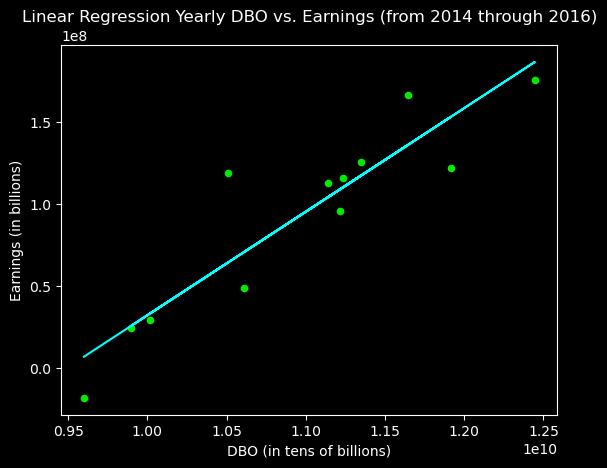

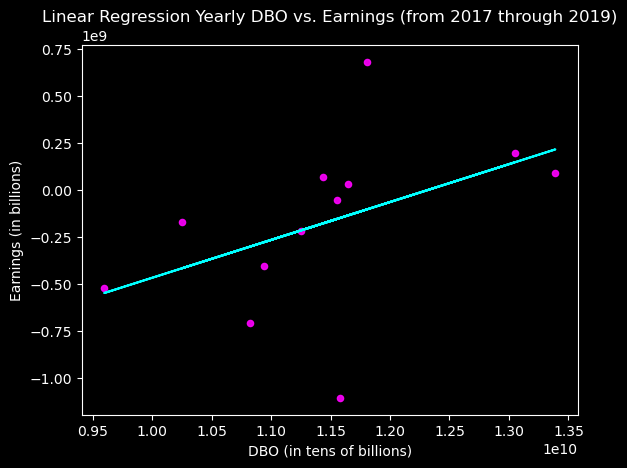

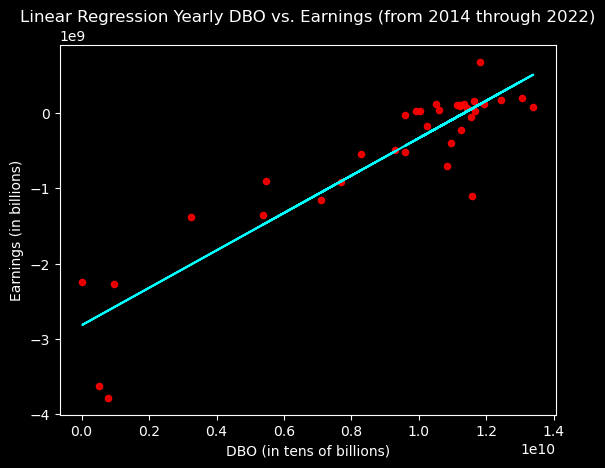

In [17]:
df.iloc[:12].plot.scatter("DBO gross", "earnings", alpha = 0.9, color="lime")
plt.plot(x.iloc[:12], y_hat1, linewidth=1.5, color = "cyan")
plt.title("Linear Regression Yearly DBO vs. Earnings (from 2014 through 2016)")
plt.xlabel("DBO (in tens of billions)")
plt.ylabel("Earnings (in billions)")
plt.savefig("plots/regression.2014.2016.png")
plt.show()

df.iloc[12:24].plot.scatter("DBO gross", "earnings", alpha = 0.9, color="magenta")
plt.plot(x.iloc[12:24], y_hat2, linewidth=1.5, color = "cyan")
plt.title("Linear Regression Yearly DBO vs. Earnings (from 2017 through 2019)")
plt.xlabel("DBO (in tens of billions)")
plt.ylabel("Earnings (in billions)")
plt.savefig("plots/regression.2017.2019.png")
plt.show()

df.plot.scatter("DBO gross", "earnings", alpha = 0.9, color="red")
plt.plot(x, y_hat3, linewidth=1.5, color = "cyan")
plt.title("Linear Regression Yearly DBO vs. Earnings (from 2014 through 2022)")
plt.xlabel("DBO (in tens of billions)")
plt.ylabel("Earnings (in billions)")
plt.savefig("plots/regression.2014.2022.png")
plt.show()

Residuals

In [18]:
%%latex
$$
y - \hat{y}
$$

<IPython.core.display.Latex object>

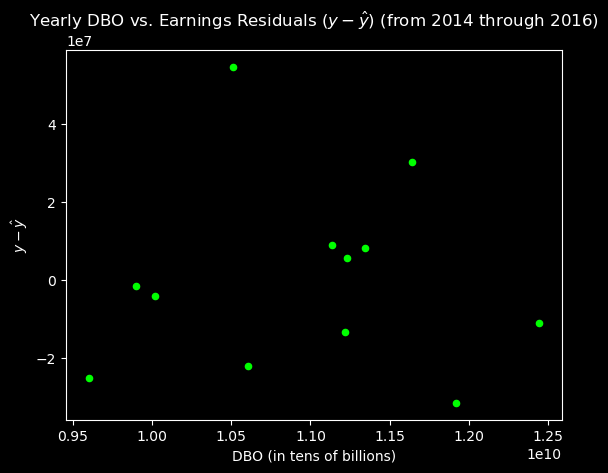

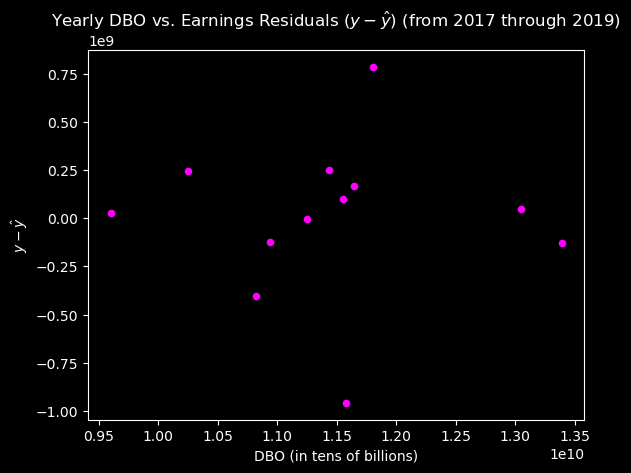

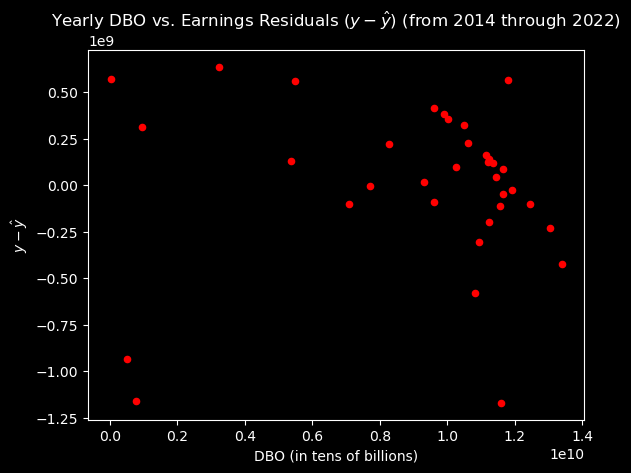

In [19]:
df["residuals1"] = residuals1 = y.iloc[:12] - y_hat1
df["residuals2"] = residuals2 = y.iloc[12:24] - y_hat2
df["residuals3"] = residuals3 = y - y_hat3

df.iloc[:12].plot.scatter("DBO gross", "residuals1", color="lime")
plt.title("Yearly DBO vs. Earnings Residuals ($y - \hat{y}$) (from 2014 through 2016)")
plt.xlabel("DBO (in tens of billions)")
plt.ylabel("$y - \hat{y}$")
plt.savefig("plots/residuals.2014.2016.png")
plt.show()

df.iloc[12:24].plot.scatter("DBO gross", "residuals2", color="magenta")
plt.title("Yearly DBO vs. Earnings Residuals ($y - \hat{y}$) (from 2017 through 2019)")
plt.xlabel("DBO (in tens of billions)")
plt.ylabel("$y - \hat{y}$")
plt.savefig("plots/residuals.2017.2019.png")
plt.show()

df.plot.scatter("DBO gross", "residuals3", color="red")
plt.title("Yearly DBO vs. Earnings Residuals ($y - \hat{y}$) (from 2014 through 2022)")
plt.xlabel("DBO (in tens of billions)")
plt.ylabel("$y - \hat{y}$")
plt.savefig("plots/residuals.2014.2022.png")
plt.show()

The total sum of squares

In [20]:
%%latex
$$
\tau = \sum{ \langle y - \bar{y} \rangle^{2}}
$$

<IPython.core.display.Latex object>

In [21]:
squares = lambda y: (y - y.mean())**2

df["squares1"] = squares1 = squares(y.iloc[:12])
df["squares2"] = squares2 = squares(y.iloc[12:24])
df["squares3"] = squares3 = squares(y)

t1 = squares1.sum()
t2 = squares2.sum()
t3 = squares3.sum()

The residual sum of squares

In [22]:
%%latex
$$
\epsilon = \sum{ \langle y - \hat{y} \rangle^{2}}
$$

<IPython.core.display.Latex object>

In [23]:
df["residual squares1"] = df["residuals1"]**2
df["residual squares2"] = df["residuals2"]**2
df["residual squares3"] = df["residuals3"]**2

e1 = df["residual squares1"].sum()
e2 = df["residual squares2"].sum()
e3 = df["residual squares3"].sum()

Coefficient of Determination

In [24]:
%%latex
$$
r^{2} = 1 - \frac{\epsilon}{\tau}
$$

<IPython.core.display.Latex object>

In [25]:
r_2_1 = 1 - (e1 / t1)
r_2_2 = 1 - (e2 / t2)
r_2_3 = 1 - (e3 / t3)
print(f"""
For 2014 through 2016:
 The Coefficient of Determination is: {r_2_1}

For 2017 through 2019:
 The Coefficient of Determination is: {r_2_2}

For 2014 through 2022:
 The Coefficient of Determination is: {r_2_3}
""")


For 2014 through 2016:
 The Coefficient of Determination is: 0.8315031312384981

For 2017 through 2019:
 The Coefficient of Determination is: 0.2057984880721423

For 2014 through 2022:
 The Coefficient of Determination is: 0.8220744095125301



The standard deviation about the least-squares line $\sigma_{\epsilon}$

In [26]:
%%latex
$$
\sigma_{\epsilon} = \sqrt{ \frac{\epsilon}{n - 2} }
$$

<IPython.core.display.Latex object>

In [27]:
rssd = lambda e, df: math.sqrt((e / (len(df) - 2)))

sd1  = y.loc[:12].std()
sd2  = y.loc[12:24].std()
sd3  = y.std()

r1   = rssd(e1, df.iloc[:12])
r2   = rssd(e2, df.iloc[12:24])
r3   = rssd(e3, df)

print(f"""
For 2014 through 2016:
 The Standard deviation about y is: {sd1:,.7f}
 The Standard deviation about the least-squares line: {r1:,.8f}

For 2017 through 2019:
 The Standard deviation about y is: {sd2:,.7f}
 The Standard deviation about the least-squares line: {r2:,.8f}

For 2014 through 2022:
 The Standard deviation about y is: {sd3:,.7f}
 The Standard deviation about the least-squares line: {r3:,.8f}
""")


For 2014 through 2016:
 The Standard deviation about y is: 59,186,777.5202432
 The Standard deviation about the least-squares line: 25,554,998.54506667

For 2017 through 2019:
 The Standard deviation about y is: 465,442,163.1875729
 The Standard deviation about the least-squares line: 435,038,226.38255721

For 2014 through 2022:
 The Standard deviation about y is: 1,039,426,652.4898386
 The Standard deviation about the least-squares line: 445,036,411.52865213



In [28]:
m1 = x.loc[:12].min()
m2 = x.loc[12:24].min()
m3 = x.min()
minimum = max([m1, m2, m3])

m1 = x.loc[:12].max()
m2 = x.loc[12:24].max()
m3 = x.max()
maximum = min([m1, m2, m3])

print("The DBO minimum and maximum predictive range for all 3 models together is:\n"
      f" minimum = {minimum:,.0f}\n maximum = {maximum:,.0f}")

The DBO minimum and maximum predictive range for all 3 models together is:
 minimum = 9,600,109,748
 maximum = 12,445,502,384


# Predictions

### First, let's compare predictive models

In [29]:
clean = lambda v: f"{v:,.0f}"

X  = list(range(9600000000, 12500000000, 250000000))
Y1 = pd.Series([a1 + b1 * x for x in X])
Y2 = pd.Series([a2 + b2 * x for x in X])
Y3 = pd.Series([a3 + b3 * x for x in X])
X  = [clean(x) for x in X]

mY1 = Y1.mean(), Y1.min(), Y1.max()
mY2 = Y2.mean(), Y2.min(), Y2.max()
mY3 = Y3.mean(), Y3.min(), Y3.max()

Y1 = [clean(y) for y in Y1]
Y2 = [clean(y) for y in Y2]
Y3 = [clean(y) for y in Y3] 

columns = ["DBO", "Earnings (2014 - 2016)", "Earnings (2017 - 2019)", "Earnings (2014 - 2022)"]

predictions = pd.DataFrame(np.array([X, Y1, Y2, Y3]).T, columns = columns)

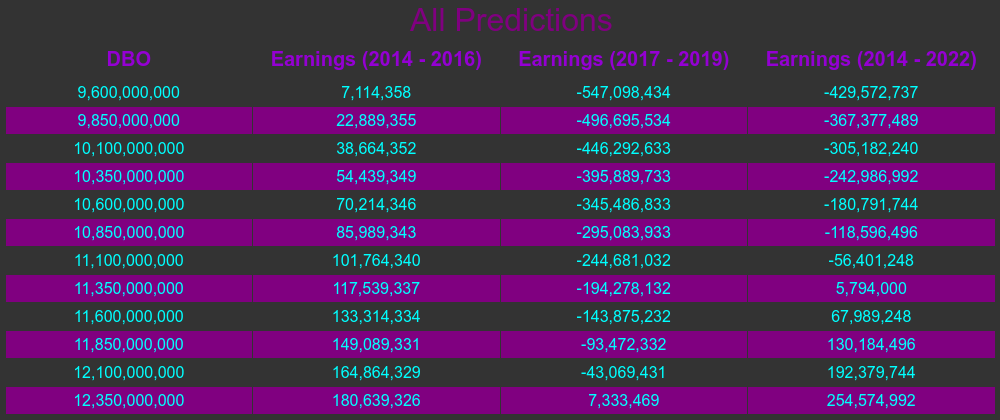

In [30]:
bg   = "#333333"
font = "Arial"

fig = df2img.plot_dataframe(predictions,

    title={"text": "All Predictions", "font_color": "purple", "font_size": 32, 
           "font_family": font, "x": 0.41, "yanchor": "middle"},
    
    tbl_header = {"align": "center", "fill_color": bg, "font_color": "darkviolet", 
                  "font_size": 20, "line": {"color": bg}, "font_family": font},
         
    tbl_cells = {"align": "center", "fill_color": bg, "font_color": "cyan", 
                 "font_size": 16, "line": {"color": bg}, "height": 28, "font_family": font},
                 row_fill_color = (bg, "purple"),
    
    print_index = False,
    paper_bgcolor = bg,
    fig_size = (1000, 420),
    col_width = 6)

df2img.save_dataframe(fig = fig, filename = "dataframes/all.predictions.png")

Clearly AMC was fundamentally in a much better position prior to Adam Aron becoming CEO. Since
far less DBO was required to turn a profit.

In [31]:
print(f"""
Approximate descriptive statistics of the predicted earnings. 

 For 2014 through 2016: 
    
    mean:   {mY1[0]:,.0f}
    min:    {mY1[1]:,.0f}
    max:    {mY1[2]:,.0f}
 
 For 2017 through 2019: 
 
    mean:   {mY2[0]:,.0f}
    min:    {mY2[1]:,.0f}
    max:    {mY2[2]:,.0f}
 
 For 2014 through 2022:

    mean:   {mY3[0]:,.0f}
    min:    {mY3[1]:,.0f}
    max:    {mY3[2]:,.0f}

""")


Of the predicted values approximated descriptive statistics... 

...for 2014 through 2016: 
    
    mean:   93,876,842
    min:    7,114,358
    max:    180,639,326
 
...for 2017 through 2019: 
 
    mean:   -269,882,483
    min:    -547,098,434
    max:    7,333,469
 
...for 2014 through 2022:

    mean:   -87,498,872
    min:    -429,572,737
    max:    254,574,992




### 2023 Yearly Earnings Predictions from DBO Isolate

In [32]:
minimum = int(max(df["DBO gross"].min(), 7500000000))
maximum = int(df["DBO gross"].max())

inc = 500000000

X = list(range(minimum, maximum + inc, inc))
Y = pd.Series([a3 + b3 * x for x in X])

DBO      = X
Lowest   = Y - (2 * r3)
Low      = Y - r3
Earnings = Y
High     = Y + r3
Highest  = Y + (2 * r3)

DBO      = [clean(x) for x in DBO]
Lowest   = [clean(s) for s in Lowest]
Low      = [clean(s) for s in Low]
Earnings = [clean(y) for y in Earnings]
High     = [clean(s) for s in High]
Highest  = [clean(s) for s in Highest]

columns = ["DBO", "Lowest", "Low", "Earnings", "High", "Highest"]

prediction2 = pd.DataFrame(np.array([DBO, Lowest, Low, Earnings, High, Highest]).T,
                           columns = columns)

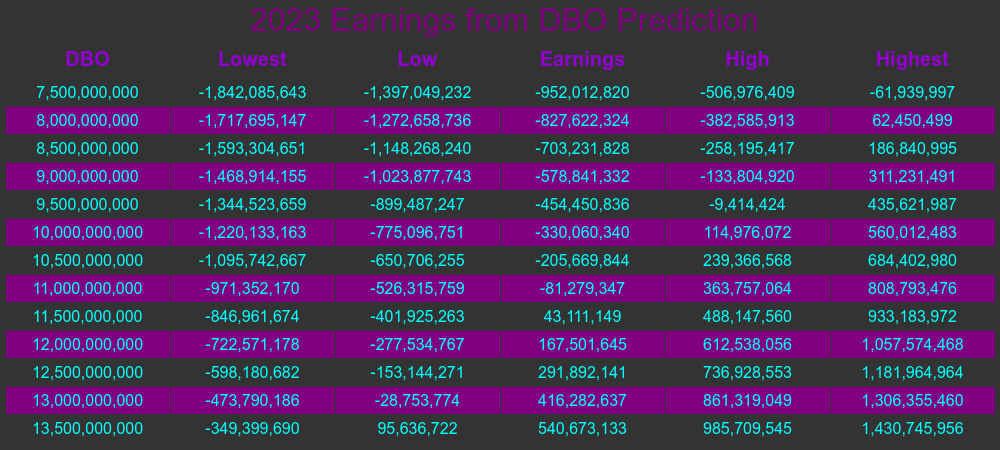

In [33]:
bg   = "#333333"
font = "Arial"

fig = df2img.plot_dataframe(prediction2,

    title={"text": "2023 Earnings from DBO Prediction", "font_color": "purple", "font_size": 32, 
           "font_family": font, "x": 0.25, "yanchor": "middle"},
    
    tbl_header = {"align": "center", "fill_color": bg, "font_color": "darkviolet", 
                  "font_size": 20, "line": {"color": bg}, "font_family": font},
         
    tbl_cells = {"align": "center", "fill_color": bg, "font_color": "cyan", 
                 "font_size": 16, "line": {"color": bg}, "height": 28, "font_family": font},
                 row_fill_color = (bg, "purple"),
    
    print_index = False,
    paper_bgcolor = bg,
    fig_size = (1000, 450),
    col_width = 6)

df2img.save_dataframe(fig = fig, filename = "dataframes/2023.prediction.png")

- The projected 2023 domestic box office is expected to be $9B
- The 'Earnings' column is the prediction
- There is an approximate 68% chance that the actual earnings will fall within the range 'Low' to 'High'
- There is an approximate 98% chance that the actual earnings will fall within the range 'Lowest' to 'Highest'

This model has incredibly strong predictive power.

In [34]:
df.to_csv("model.csv", index=True)

# Float Size History Since 2016

In [35]:
df = pd.read_csv("float_history.csv", index_col=0)

# 2016 to 2020 (excluding 2020) float size increase
f1 = df.loc[4].float / df.loc[0].float

# 2020 to 2023 float size increase
f2 = df.loc[11].float / df.loc[4].float

# Since 2016 float size increase
f3 = df.loc[11].float / df.loc[0].float

# If reverse split passes
f4 = 1.032 * 10**9 / df.loc[0].float

print(f"\nFrom 2016 through 2019 Adam increased the float {f1 * 100:,.2f}%")
print(f"From 2020 to 2023, only, Adam increased the float {f2 * 100:,.2f}%")
print(f"Adams total float increase is {f3 * 100:,.2f}%")
print(f"If rs-c passed the total float increase would be {f4 * 100:,.2f}% before the split")
print(f"\nThat is nearly {47.7557:,.2f} times the size of the float "
       "before Adam took over AMC.")


From 2016 through 2019 Adam increased the float 240.86%
From 2020 to 2023, only, Adam increased the float 992.93%
Adams total float increase is 2,391.58%
If rs-c passed the total float increase would be 4,775.57% before the split

That is nearly 47.76 times the size of the float before Adam took over AMC.


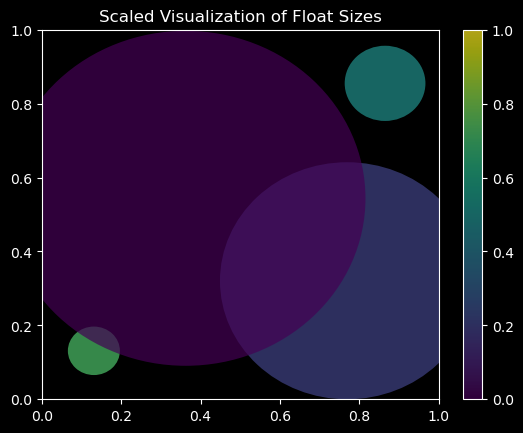

In [36]:
# a = pi r^2
# a / pi = r^2
# sqrt(a / pi) = r
scale = 40000

area = df.loc[0].float
r1 = math.sqrt(area / math.pi) / scale
r2 = math.sqrt((area * f1) / math.pi) / scale
area = df.loc[4].float
r3 = math.sqrt((area * f2) / math.pi) / scale
area = df.loc[0].float
r4 = math.sqrt((area * f4) / math.pi) / scale


fig, ax = plt.subplots()

patches = []
c1 = Circle((r1*2, r1*2), r1)
c2 = Circle((r2*.5*17, r2*1.4*6), r2)
c3 = Circle((r3*.6*4, r3*.25*4), r3)
c4 = Circle((r4*.2*4, r4*.3*4), r4)
patches.extend([c1, c2, c3, c4])

p = PatchCollection(patches, alpha=0.7)
colors = [.72, .5, .2, .0, 1, .0]
p.set_array(colors)
ax.add_collection(p)
fig.colorbar(p, ax=ax)
plt.title("Scaled Visualization of Float Sizes")
plt.savefig("plots/dilution.png")
plt.show()